# Ejercicio 1. 

Descarga la estructura de la proteína de la hemoglobina humana (código PDB: 1A3N), visualízala, y carga el archivo en Biopython (creando un objeto estructura).

In [1]:
import warnings, py3Dmol
import nglview as nv
from Bio.PDB import PDBParser
from Bio.PDB.vectors import calc_dihedral
import numpy as np
from functions import download_pdb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### 1. Descarga la estructura de la proteína de la hemoglobina humana (código PDB: 1A3N)

In [2]:
route = download_pdb("1A3N", "./files/1A3N.pdb")

Archivo PDB '1A3N.pdb' descargado exitosamente en './files/1A3N.pdb'.


### 2. Visualización de la estructura de la proteína de la hemoglobina humana

In [3]:
warnings.filterwarnings("ignore")

parser = PDBParser(QUIET=True)
pdb_code = "1A3N"

structure = parser.get_structure(pdb_code, f"./files/{pdb_code}.pdb")

print(f"Modelo(s) en la estructura: {len(structure)}")
for model in structure:
    print(f"Modelo {model.id} tiene {len(model)} cadenas.")

Modelo(s) en la estructura: 1
Modelo 0 tiene 4 cadenas.


In [4]:
view = nv.show_biopython(structure)
view.clear_representations()
view.add_representation('cartoon', selection='protein')
view.add_representation('ball+stick', selection='heme')
view

NGLWidget()

In [5]:
with open(route, 'r') as archivo:
    pdb_data = archivo.read()

chains =  list(structure.get_chains())
colours_list = ['cyan', 'magenta', 'yellow', 'green', 'orange', 'purple', 'blue', 'red']
colours = {chain.id: colours_list[idx % len(colours_list)] for idx, chain in enumerate(chains)}

view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_data, 'pdb')
for chain_id, color in colours.items():
    view.addStyle({'chain': chain_id}, {'cartoon': {'color': color}})
view.addStyle({'resn': 'HEM'}, {'stick': {'colorscheme': 'redCarbon'}})
view.zoomTo()
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

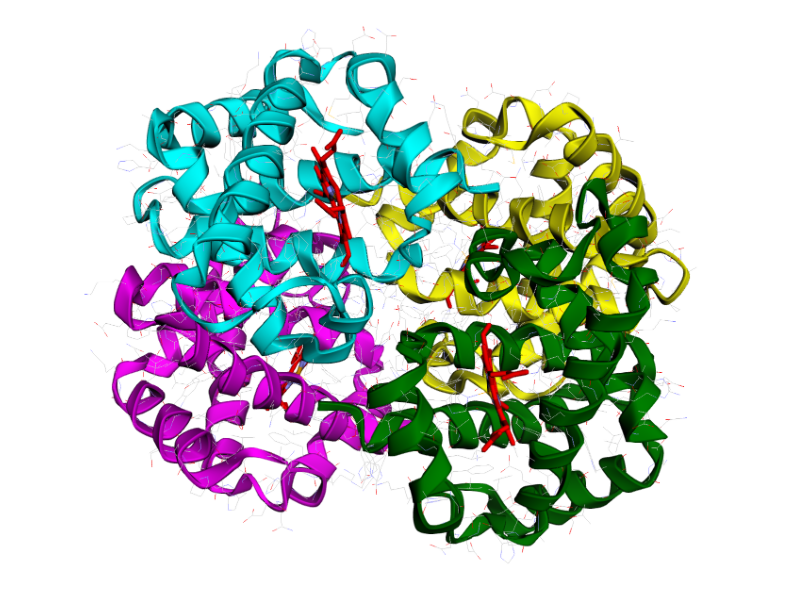

In [5]:
image_path = "./results/estructura_1.png"

plt.figure(figsize=(10, 8)) 

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

### (a) Calcula la distancia entre los átomos O del primer y último residuo de la cadena A de la hemoglobina

In [6]:
model  = next(structure.get_models())
chain_A = model['A']

residues = list(chain_A.get_residues())
first_residue = residues[0]
last_residue = residues[-1]

In [11]:
def get_atom(residue, atom_id):
    try:
        return residue[atom_id]
    except KeyError:
        print(f"El residuo {residue.get_resname()} {residue.id[1]} no tiene un átomo '{atom_id}'.")
        return None

first_O_atom = get_atom(first_residue, 'O')
last_O_atom = get_atom(last_residue, 'O')

if first_O_atom is None:
    print("El primer residuo no tiene un átomo 'O' definido.")
if last_O_atom is None:
    print("El último residuo no tiene un átomo 'O' definido.")

Átomo 'O' del primer residuo: <Atom O>
Átomo 'O' del último residuo: <Atom O>


In [13]:
def calculate_distance(atom1, atom2):
    distance = atom1 - atom2
    return distance

if first_O_atom and last_O_atom:
    distancia = calculate_distance(first_O_atom, last_O_atom)
    print(f"La distancia entre los átomos O del primer y último residuo de la cadena A es: {distancia:.2f} Å")

[ 8.164 20.005  6.015]
[-9.594  8.47  25.651]
La distancia entre los átomos O del primer y último residuo de la cadena A es: 28.88 Å


In [14]:
view = py3Dmol.view(width=800, height=600)

with open(route, 'r') as archivo:
    pdb_data = archivo.read()

view.addModel(pdb_data, 'pdb')
view.setStyle({'cartoon': {'color': 'white', 'opacity': 0.4}})
view.addStyle({'chain': 'A'}, {'cartoon': {'color': 'green', 'opacity': 0.6}})

highlighted_atoms = [
    {'atom': first_O_atom, 'color': 'blue'},
    {'atom': last_O_atom, 'color': 'green'}
]

for item in highlighted_atoms:
    atom = item['atom']
    color = item['color']
    if atom:
        view.addSphere({
            'center': {
                'x': float(atom.coord[0]),
                'y': float(atom.coord[1]),
                'z': float(atom.coord[2])
            },
            'radius': 0.5,
            'color': color,
            'opacity': 1.0
        })

def add_distance_line(atom1, atom2, color='red', radius=0.2):
    view.addCylinder({
        'start': {'x': float(atom1.coord[0]), 'y': float(atom1.coord[1]), 'z': float(atom1.coord[2])},
        'end': {'x': float(atom2.coord[0]), 'y': float(atom2.coord[1]), 'z': float(atom2.coord[2])},
        'radius': radius,
        'color': color,
        'opacity': 1.0
    })

if first_O_atom and last_O_atom:
    distancia = calculate_distance(first_O_atom, last_O_atom)
    add_distance_line(first_O_atom, last_O_atom, color='red')
    midpoint = (
        (first_O_atom.coord[0] + last_O_atom.coord[0]) / 2,
        (first_O_atom.coord[1] + last_O_atom.coord[1]) / 2,
        (first_O_atom.coord[2] + last_O_atom.coord[2]) / 2
    )
    view.addLabel(f"Distancia: {distancia:.2f} Å", {
        'position': {'x': midpoint[0], 'y': midpoint[1], 'z': midpoint[2]},
        'backgroundColor': 'white',
        'fontColor': 'black',
        'fontSize': 14,
        'showBackground': True
    })

view.setBackgroundColor('white')
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

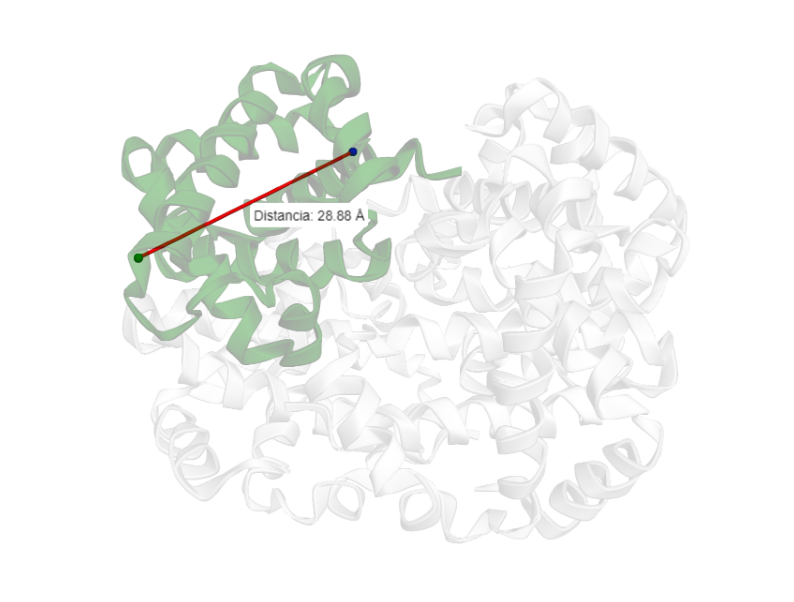

In [15]:
image_path = "./results/ej_1_a.png"

plt.figure(figsize=(10, 8)) 

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

### (b) Calcula el ángulo diedro entre los átomos N,CA,C, y O del primer residuo de la cadena A

In [17]:
print(f"Primer Residuo: {first_residue.get_resname()} {first_residue.id[1]}")

atom_N = get_atom(first_residue, 'N')
atom_CA = get_atom(first_residue, 'CA')
atom_C = get_atom(first_residue, 'C')
atom_O = get_atom(first_residue, 'O')

if None in [atom_N, atom_CA, atom_C, atom_O]:
    print("No se pudieron encontrar todos los átomos necesarios para calcular el ángulo diedro.")

Primer Residuo: VAL 1


In [18]:
coord_N = atom_N.get_vector()
coord_CA = atom_CA.get_vector()
coord_C = atom_C.get_vector()
coord_O = atom_O.get_vector()

angle = calc_dihedral(coord_N, coord_CA, coord_C, coord_O)
angle_degrees = np.degrees(angle)
print(f"El ángulo diedro entre los átomos N, CA, C y O del primer residuo de la cadena A es: {angle_degrees:.2f}°")

El ángulo diedro entre los átomos N, CA, C y O del primer residuo de la cadena A es: -25.67°


In [21]:
view = py3Dmol.view(width=800, height=600)

highlighted_atoms = [
    {'atom': atom_N, 'color': 'green'},
    {'atom': atom_CA, 'color': 'blue'},
    {'atom': atom_C, 'color': 'orange'},
    {'atom': atom_O, 'color': 'purple'}
]

for item in highlighted_atoms:
    atom = item['atom']
    color = item['color']
    view.addSphere({
        'center': {
            'x': float(atom.coord[0]),
            'y': float(atom.coord[1]),
            'z': float(atom.coord[2])
        },
        'radius': 0.5,
        'color': color,
        'opacity': 1.0
    })

def add_cylinder(atom1, atom2, color='black', radius=0.1):
    view.addCylinder({
        'start': {'x': float(atom1.coord[0]), 'y': float(atom1.coord[1]), 'z': float(atom1.coord[2])},
        'end': {'x': float(atom2.coord[0]), 'y': float(atom2.coord[1]), 'z': float(atom2.coord[2])},
        'radius': radius,
        'color': color
    })

add_cylinder(atom_N, atom_CA, color='green')
add_cylinder(atom_CA, atom_C, color='blue')
add_cylinder(atom_C, atom_O, color='orange')

labels = {'N': 'N', 'CA': 'CA', 'C': 'C', 'O': 'O'}
for atom_name, label_text in labels.items():
    atom = get_atom(first_residue, atom_name)
    if atom:
        view.addLabel(label_text, {
            'position': {'x': float(atom.coord[0]), 'y': float(atom.coord[1]), 'z': float(atom.coord[2])},
            'backgroundColor': 'yellow',
            'fontColor': 'black',
            'fontSize': 12,
            'showBackground': True,
            'font': 'Arial'
        })

midpoint = (
    float((atom_N.coord[0] + atom_CA.coord[0] + atom_C.coord[0] + atom_O.coord[0]) / 4),
    float((atom_N.coord[1] + atom_CA.coord[1] + atom_C.coord[1] + atom_O.coord[1]) / 4),
    float((atom_N.coord[2] + atom_CA.coord[2] + atom_C.coord[2] + atom_O.coord[2]) / 4),
)

view.addLabel(f"Ángulo Diedro: {angle_degrees:.2f}°", {
    'position': {'x': midpoint[0], 'y': midpoint[1], 'z': midpoint[2]},
    'backgroundColor': 'white',
    'fontColor': 'black',
    'fontSize': 14,
    'showBackground': True
})

view.setBackgroundColor('white')
view.zoomTo()
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

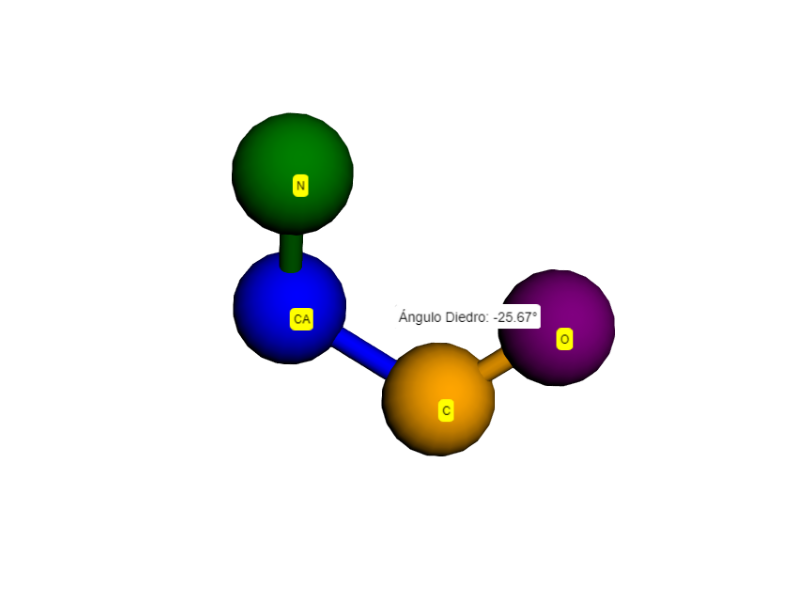

In [22]:
image_path = "./results/ej_1_b.png"

plt.figure(figsize=(10, 8)) 

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

### (c) Calcula el centro de masas de la estructura de la hemoglobina

El **centro de masas (center of mass)** de una estructura molecular se calcula como el promedio ponderado de las coordenadas de todos los átomos en la estructura, donde el peso de cada átomo es su masa. La fórmula es la siguiente:

$$
\text{Centro de masas (COM)} = \frac{\sum (m_i \cdot r_i)}{\sum m_i}
$$

Donde:
- $ m_i $ es la masa del átomo $ i $ (generalmente el peso atómico de su elemento).
- $ r_i $ es el vector de coordenadas (x, y, z) del átomo $ i $.
- La suma se realiza sobre todos los átomos de la estructura.

Información de las masas atómicas: [Disponible aquí](https://www.lenntech.es/periodica/masa/masa-atomica.htm)

In [23]:
unique_elements = set()

for atom in structure.get_atoms():
    element = atom.element.strip().upper()
    unique_elements.add(element)

print(f"Elementos distintos en la estructura: {unique_elements}")

Elementos distintos en la estructura: {'FE', 'C', 'S', 'O', 'N'}


In [24]:
atomic_masses = {
    'C': 12.0107,
    'N': 14.0067,
    'O': 15.9994,
    'S': 32.065,
    'FE': 55.845
}

def get_mass(element):
    element = element.upper()
    return atomic_masses.get(element, 0.0) 

In [25]:
atomic_mass = 0.0
sum_x = 0.0
sum_y = 0.0
sum_z = 0.0

for atom in structure.get_atoms():
    element = atom.element.strip().upper()
    masa = get_mass(element)
    x, y, z = atom.get_coord()
    atomic_mass += masa
    sum_x += masa * x
    sum_y += masa * y
    sum_z += masa * z

centro_masas = np.array([sum_x, sum_y, sum_z]) / atomic_mass

print(f"Centro de Masas de la Hemoglobina: ({centro_masas[0]:.2f}, {centro_masas[1]:.2f}, {centro_masas[2]:.2f}) Å")

Centro de Masas de la Hemoglobina: (14.45, 2.01, 13.18) Å


In [26]:
view = py3Dmol.view(width=800, height=600)

with open(route, 'r') as archivo:
    pdb_data = archivo.read()

view.addModel(pdb_data, 'pdb')

view.setStyle({'cartoon': {'color': 'spectrum'}})
view.addStyle({'chain': 'A'}, {'cartoon': {'color': 'cyan'}})
view.addStyle({'chain': 'B'}, {'cartoon': {'color': 'magenta'}})
view.addSphere({
    'center': {'x': centro_masas[0], 'y': centro_masas[1], 'z': centro_masas[2]},
    'radius': 2.0,
    'color': 'red',
    'opacity': 0.8
})
view.addLabel("Centro de Masas", {
    'position': {'x': centro_masas[0], 'y': centro_masas[1], 'z': centro_masas[2]},
    'backgroundColor': 'white',
    'fontColor': 'black',
    'fontSize': 14,
    'showBackground': True
})

view.setBackgroundColor('white')
view.zoomTo()
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

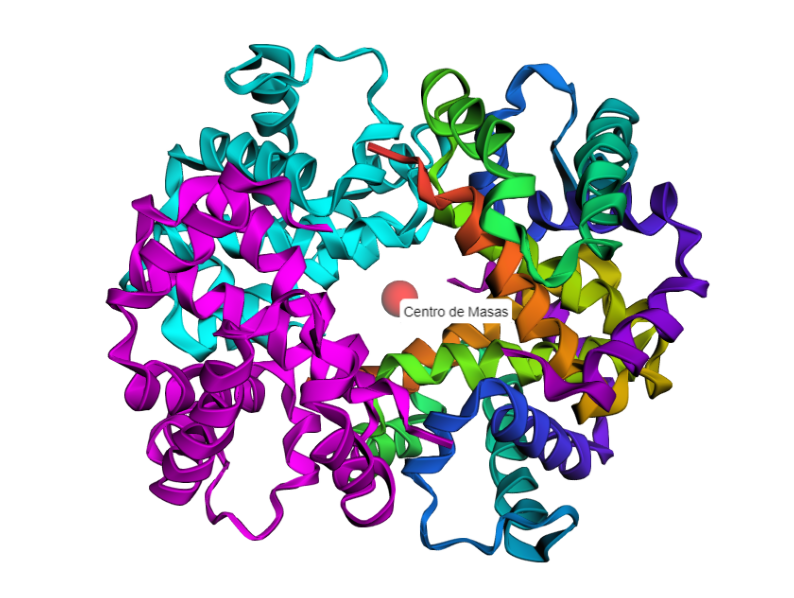

In [27]:
image_path = "./results/ej_1_c.png"

plt.figure(figsize=(10, 8)) 

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()